['copiapo', (-27.366298, -70.332704), 'drive_service']


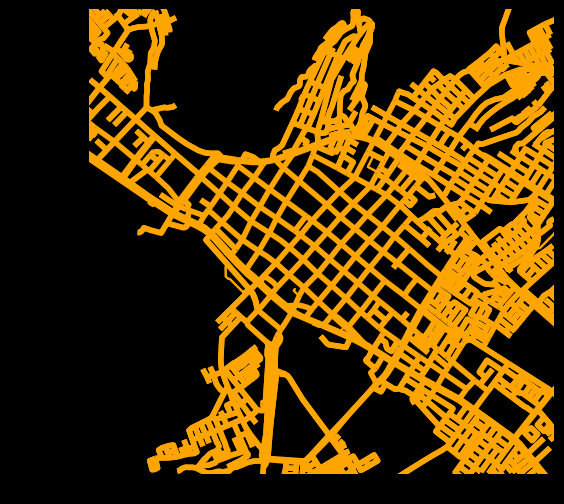

['santiago', (-33.438078, -70.650522), 'drive_service']


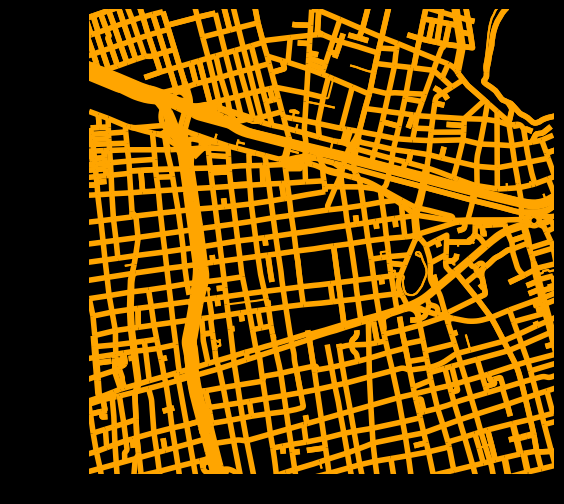

['valparaiso', (-33.048257, -71.607499), 'drive_service']


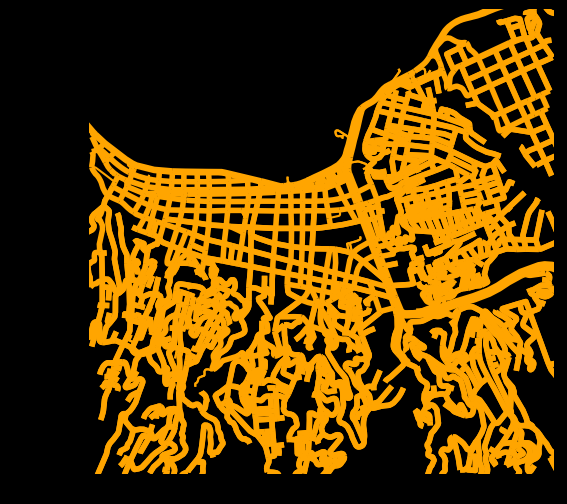

['laserena', (-29.902932, -71.251965), 'drive_service']


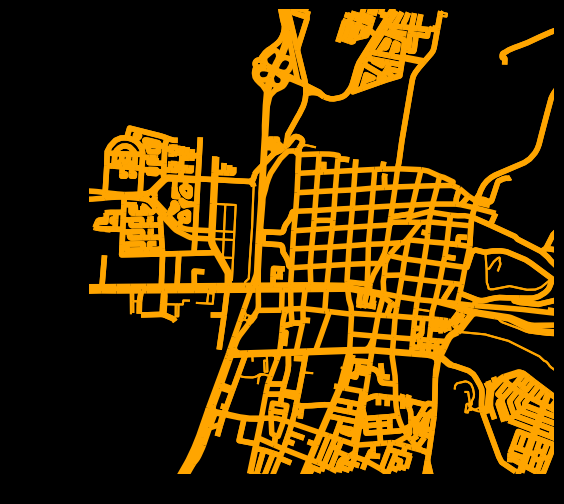

['antofogasta', (-23.646547, -70.397999), 'drive_service']


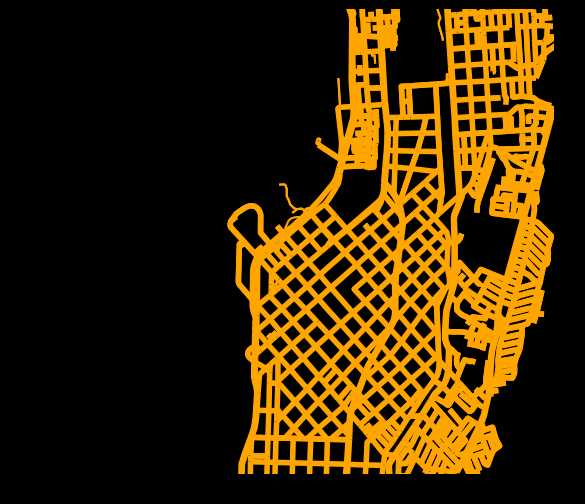

['vinadelmar', (-33.024666, -71.551699), 'drive_service']


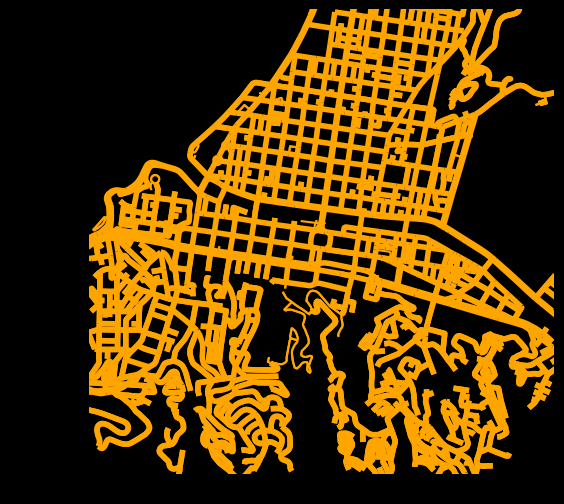

['temuco', (-38.740152, -72.590115), 'drive_service']


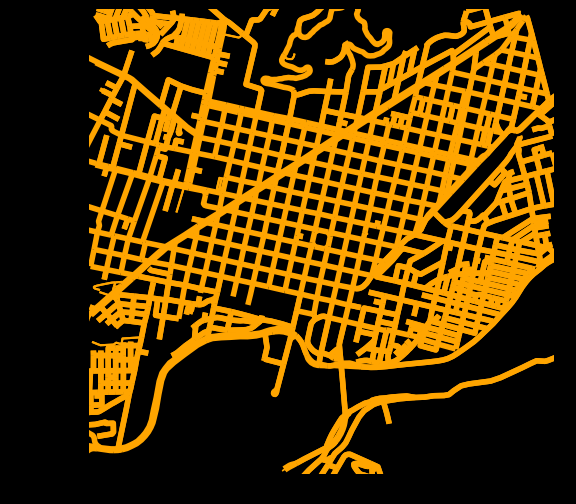

['concepcion', (-36.827436, -73.050193), 'drive_service']


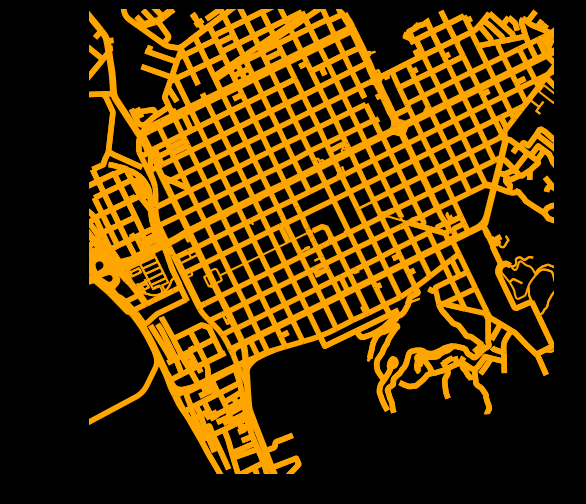

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline  
ox.config(log_console=True)

dist = 2*805 #radius in meters(one mile approx)
places = [
    ['copiapo', (-27.366298, -70.332704), 'drive_service'],
    ['santiago', (-33.438078, -70.650522), 'drive_service'],
    ['valparaiso', (-33.048257, -71.607499), 'drive_service'],
    ['laserena', (-29.902932, -71.251965), 'drive_service'],
    ['antofogasta', (-23.646547, -70.397999), 'drive_service'],
    ['vinadelmar', (-33.024666, -71.551699), 'drive_service'],
    ['temuco', (-38.740152, -72.590115), 'drive_service'],
    ['concepcion', (-36.827436, -73.050193), 'drive_service']
]

for plot_num, place in enumerate(places):
    print(place)
    name, point, nt = place
    G = ox.graph_from_point(point, distance=dist, distance_type='bbox', network_type=nt, truncate_by_edge=True)
    G = ox.project_graph(G)
    
    ew = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if data['highway'] in ['footway', 'steps', 'pedestrian', 'service', 'footway', 'path', 'track']:
            width = 1.5
        elif data['highway'] in ['motorway']:
            width = 6
        else:
            width = 4
        ew.append(width)

    bbox_proj = ox.bbox_from_point(point, dist, project_utm=True)
    
    _, _ = ox.plot_graph(G, bbox=bbox_proj, 
                  margin=0, node_size=0, edge_linewidth=ew, edge_color='orange', bgcolor='#000000',
                  show=True)
    
#     # save to file instead    
#     ox.plot_graph(G, bbox=bbox_proj, 
#                   margin=0, node_size=0, edge_linewidth=ew, edge_color='orange', bgcolor='#000000',
#                   show=False, save=True, filename="01_{}".format(name), file_format="svg")

References
=======

- https://github.com/gboeing/osmnx
- http://geoffboeing.com/2017/01/square-mile-street-network-visualization/